# Importing Libraries



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the Data

In [30]:
df = pd.read_csv('kyphosis.csv')

In [31]:
df.head() # represents a number of patients who had kyphosis which is a spinal condition and then they had an operation. Kyphosis column represents whether or not kyphosis was absent of present after the operation. Age as month. The number is a number of vertebrae involved in the operation. Start is the number of first or top most vertebrae that was operated on.

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


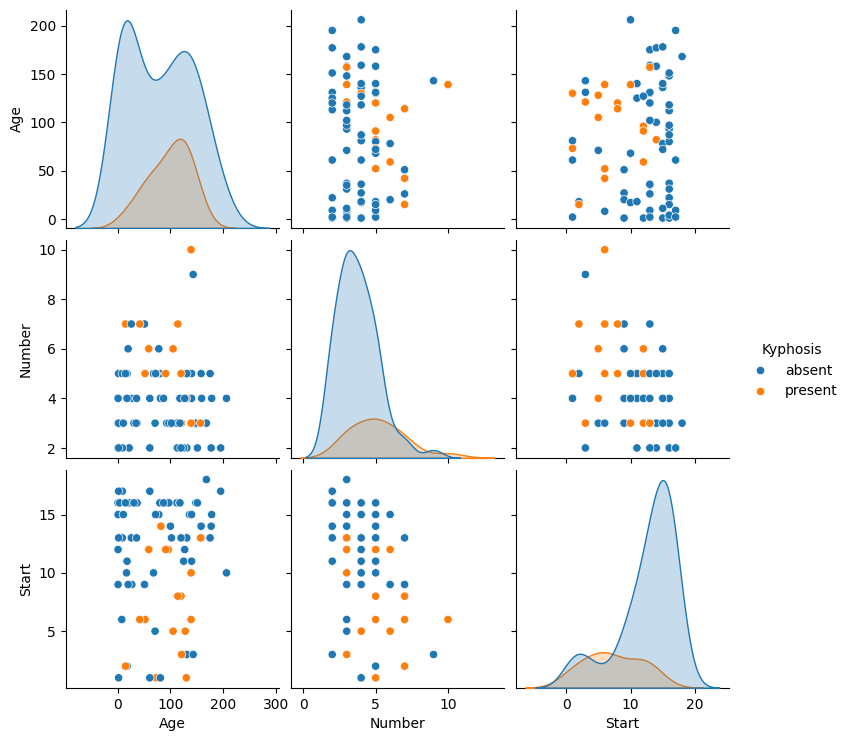

In [33]:
sns.pairplot(df, hue='Kyphosis')

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('Kyphosis', axis=1) # basically we are trying to predict whether patient after a certain number of months after their surgery are they healed or not? Is the condition still present?

In [36]:
y=df['Kyphosis']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [41]:
predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[17  3]
 [ 3  2]]


              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



# Tree Visualization

In [44]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

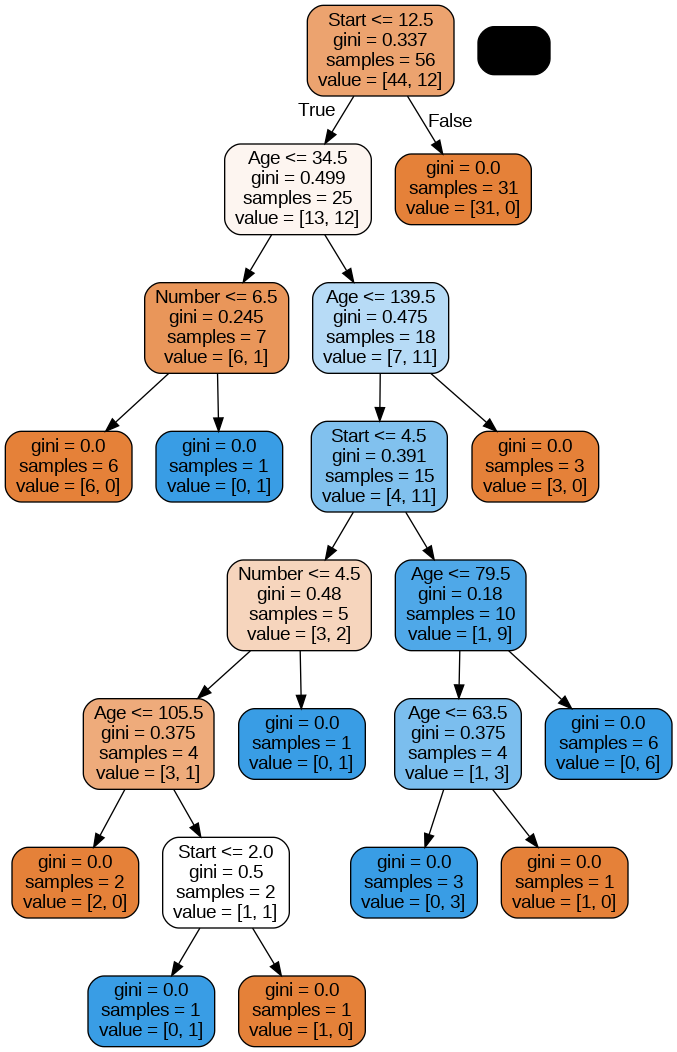

In [45]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=200)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [49]:
rfc_pred = rfc.predict(X_test)

In [50]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  2]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25

